# <Center>**ASSESSING AND MODELING MATHEMATICS LEARNING IN HIGHER EDUCATION**</center>

*Data citation:* B. Flamia Azevedo, M. Pacheco, F. P. Fernandes, and A. Pereira. "Dataset for Assessing Mathematics Learning in Higher Education," UCI Machine Learning Repository, 2024. [Online]. Available: https://doi.org/10.34620/dadosipb/PW3OWY.

## <center>**Data Analysis and Visualization**</center>

### **Setup**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### **Inspection and Descriptive Statistics**

In [4]:
# identify the encoding system used for the data
import chardet

with open('MathE_dataset.csv', 'rb') as rawdata:
    print(
        chardet.detect(rawdata.read(100000))
    )

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [5]:
df = pd.read_csv('MathE_dataset.csv', delimiter=';', encoding='latin1')
df.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [6]:
df.shape

(9546, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


In [8]:
# df['Subtopic'].value_counts()

In [9]:
# categorical_cols = ['Student Country', 'Question Level', 'Topic', 'Subtopic', 'Keywords']

# for col in categorical_cols:
#     # print('\n',df[col].value_counts())
#     plt.figure(figsize=(10,6))
#     if col == 'Keywords' or col == 'Subtopic': continue
#     sns.countplot(df, x=col, hue='Type of Answer')
#     plt.title(col)
#     plt.show()

In [10]:
ans_by_ques_lvl = df[['Question Level', 'Type of Answer']].value_counts().reset_index(name='count')
ans_by_ques_lvl

,Question Level,Type of Answer,count
0,Basic,0,4227
1,Basic,1,3617
2,Advanced,1,853
3,Advanced,0,849


### **Visualize the Distributions**

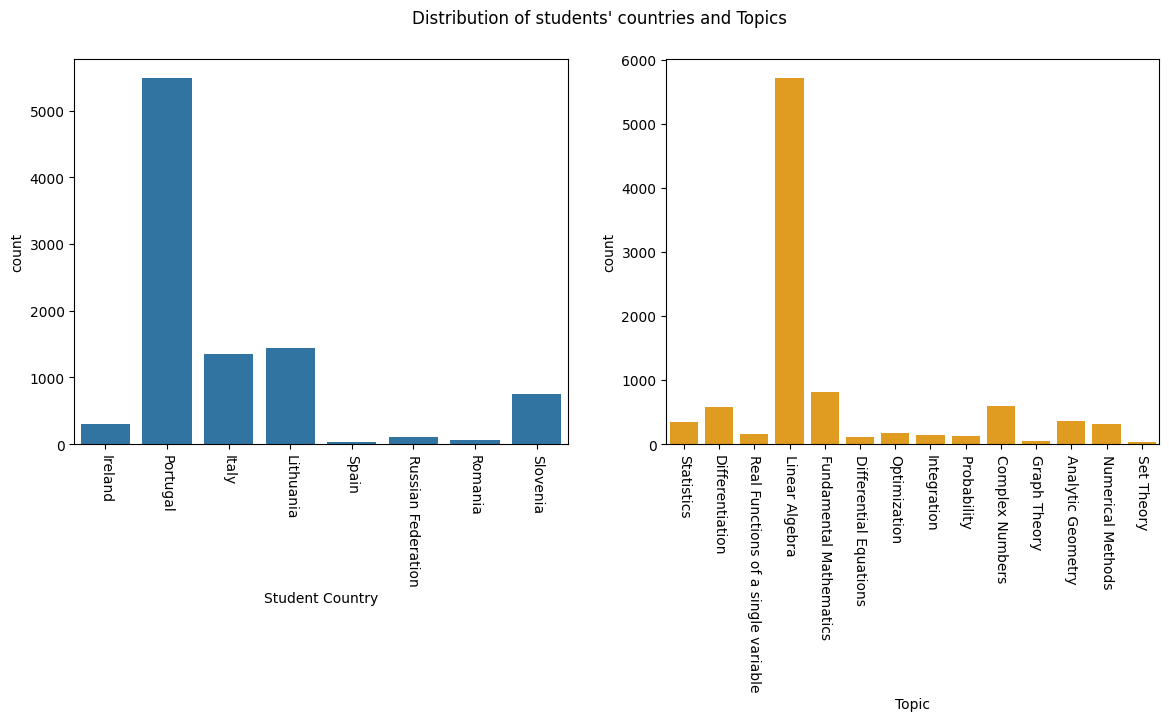

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Student Country', ax=axs[0])
axs[0].tick_params(axis = 'x', rotation=-90)

sns.countplot(data=df, x='Topic', ax=axs[1], color='orange')
axs[1].tick_params(axis = 'x', rotation=-90)

fig.suptitle('Distribution of students\' countries and Topics')
plt.show()

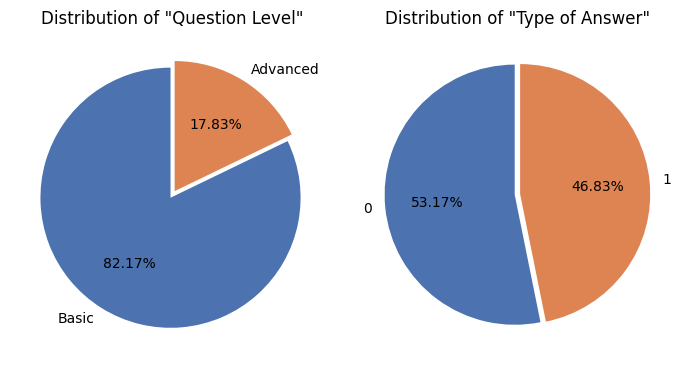

In [12]:
c = sns.color_palette("deep")

# Count values for each category
ques_level_count = df['Question Level'].value_counts()
answer_type_count = df['Type of Answer'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(7, 6))

# Define explode values
explode_ques_level_count = [0.03] * len(ques_level_count)
explode_ans_type_count = [0.021] * len(answer_type_count)

# Pie chart for 'Question Level'
axs[0].pie(ques_level_count, labels=ques_level_count.index, autopct='%1.2f%%', startangle=90, colors=c, explode=explode_ques_level_count)
axs[0].set_title('Distribution of \"Question Level\"')

# Pie chart for 'Type of Answer'
axs[1].pie(answer_type_count, labels=answer_type_count.index, autopct='%1.2f%%', startangle=90, colors=c, explode=explode_ans_type_count)
axs[1].set_title('Distribution of \"Type of Answer\"')

plt.tight_layout()
plt.show()


In [13]:
ans_by_topic = df.groupby(['Type of Answer','Topic']).size().reset_index(name='count')
ans_by_topic

,Type of Answer,Topic,count
0,0,Analytic Geometry,183
1,0,Complex Numbers,323
2,0,Differential Equations,50
3,0,Differentiation,381
4,0,Fundamental Mathematics,437
5,0,Graph Theory,23
6,0,Integration,80
7,0,Linear Algebra,2919
8,0,Numerical Methods,190
9,0,Optimization,112


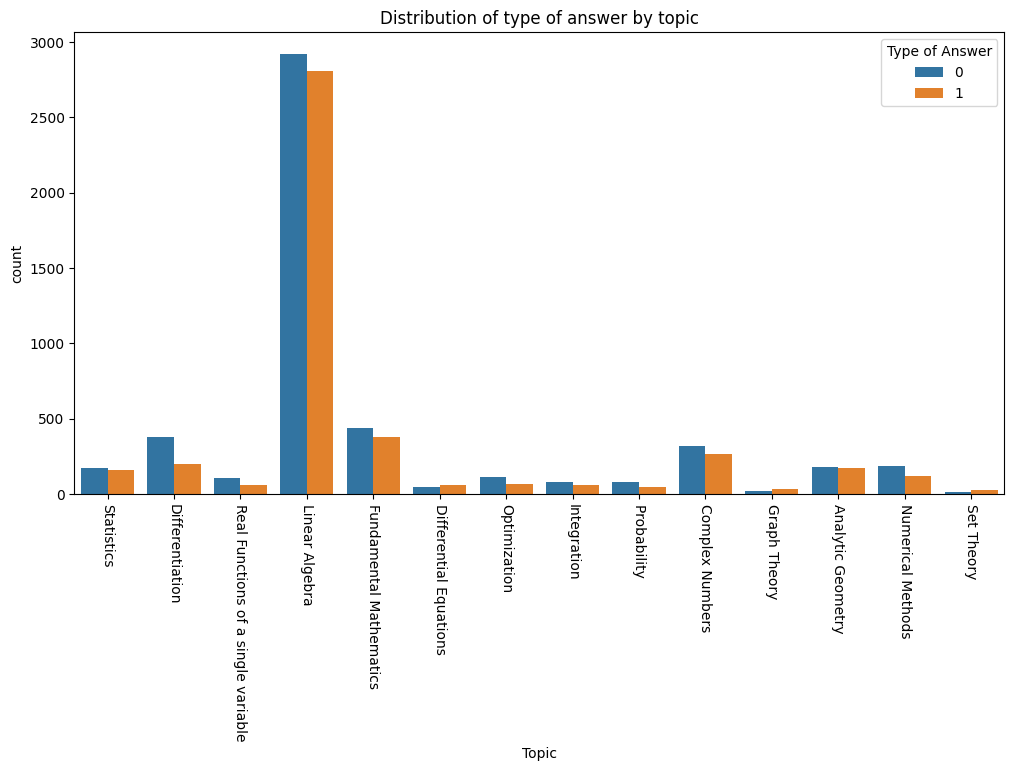

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Topic', hue='Type of Answer')
plt.tick_params(axis='x', rotation=-90)
plt.title('Distribution of type of answer by topic')
plt.show()

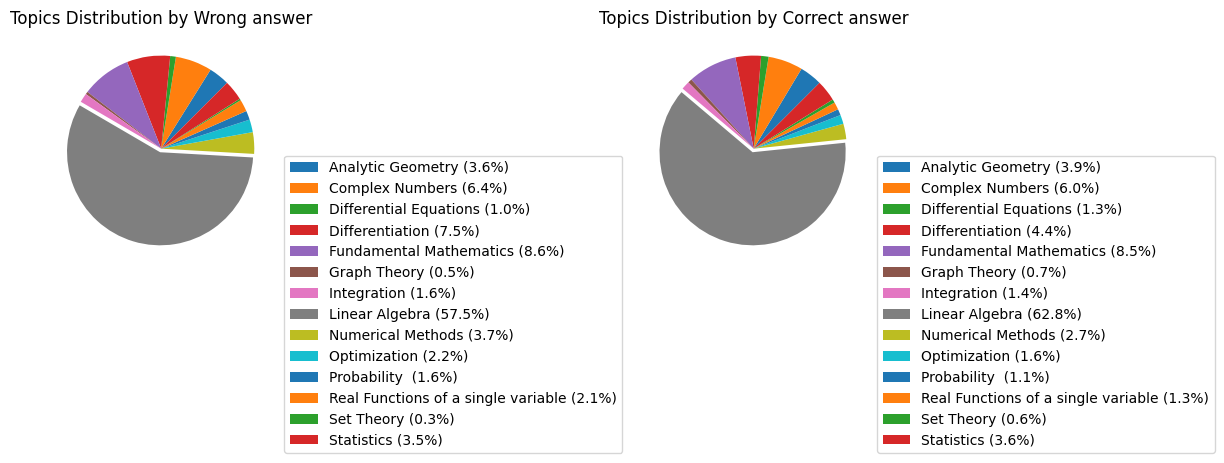

In [15]:
type_of_ans = ans_by_topic['Type of Answer'].unique()

fig, axs = plt.subplots(1, len(type_of_ans), figsize=(12, 6))

for i, ans in enumerate(type_of_ans):
    # filter data for current type of answer
    filtered_data = ans_by_topic[ans_by_topic['Type of Answer'] == ans]

    # calculate the percentage of each country
    total_count = filtered_data['count'].sum()
    percentages = (filtered_data['count'] / total_count) * 100
    labels = [f"{Topic} ({percentage:.1f}%)" for Topic, percentage in zip(filtered_data['Topic'], percentages)]

    # Plot the graph
    explode_val = (0, 0, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0)
    wedges, texts = axs[i].pie(filtered_data['count'], startangle=45, explode = explode_val)
    ans_dict = {0: 'Wrong', 1: 'Correct'}
    axs[i].set_title("Topics Distribution by " + ans_dict[i] + " answer")

    axs[i].legend(wedges, labels, bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [16]:
answer_type_count

Type of Answer
0    5076
1    4470
Name: count, dtype: int64

In [17]:
df.columns

Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords'],
      dtype='object')

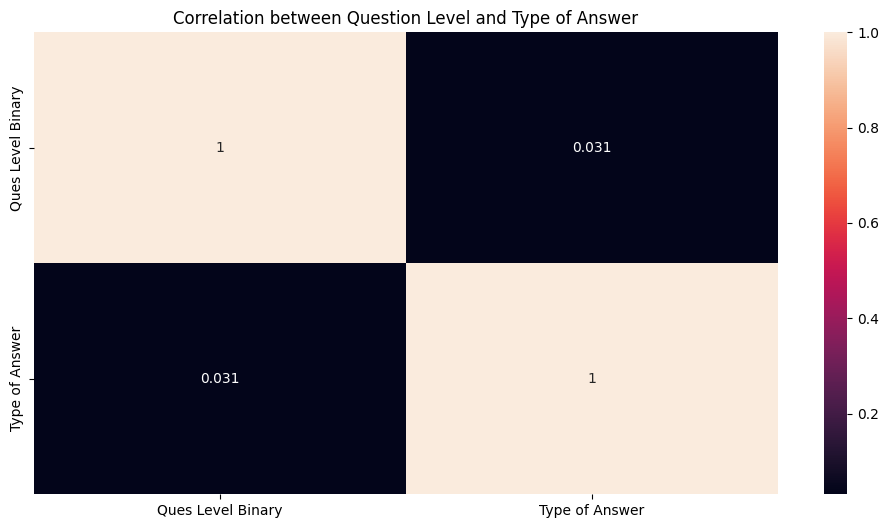

In [18]:
# Check the correlation between the question level and type of answer
plt.figure(figsize=(12, 6))

df['Ques Level Binary'] = df['Question Level'].apply(lambda x: 1 if x == 'Advanced' else 0)
sns.heatmap(
    df[['Ques Level Binary', 'Type of Answer']].corr(),
    annot=True,
)
plt.title('Correlation between Question Level and Type of Answer')
plt.show()

In [19]:
df_copy = df[['Student Country', 'Question Level', 'Topic', 'Subtopic']]
df_copy = pd.get_dummies(df_copy)
df_copy['Type of Answer'] = df['Type of Answer']
df_copy.head(1)

,Student Country_Ireland,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Romania,Student Country_Russian Federation,Student Country_Slovenia,Student Country_Spain,Question Level_Advanced,Question Level_Basic,...,Subtopic_Linear Transformations,Subtopic_Matrices and Determinants,Subtopic_Nonlinear Optimization,Subtopic_Numerical Methods,Subtopic_Partial Differentiation,Subtopic_Probability,Subtopic_Set Theory,Subtopic_Statistics,Subtopic_Vector Spaces,Type of Answer
0,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0


In [20]:
corr_matrix = df_copy.corr()
corr_with_ans = corr_matrix['Type of Answer'].sort_values(ascending=False)
corr_with_ans

Type of Answer                                                 1.000000
Student Country_Slovenia                                       0.128712
Topic_Linear Algebra                                           0.053883
Subtopic_Elementary Geometry                                   0.044444
Subtopic_Linear Systems                                        0.040261
Subtopic_Linear Transformations                                0.037843
Question Level_Advanced                                        0.030727
Subtopic_Eigenvalues and Eigenvectors                          0.023776
Topic_Set Theory                                               0.023260
Subtopic_Set Theory                                            0.023260
Subtopic_Definite Integrals                                    0.021074
Student Country_Romania                                        0.018341
Topic_Graph Theory                                             0.017324
Subtopic_Graph Theory                                          0

In [21]:
# plt.figure(figsize=(10, 6))

# sns.heatmap(
#     df_copy.corr(),
# )
# plt.show()

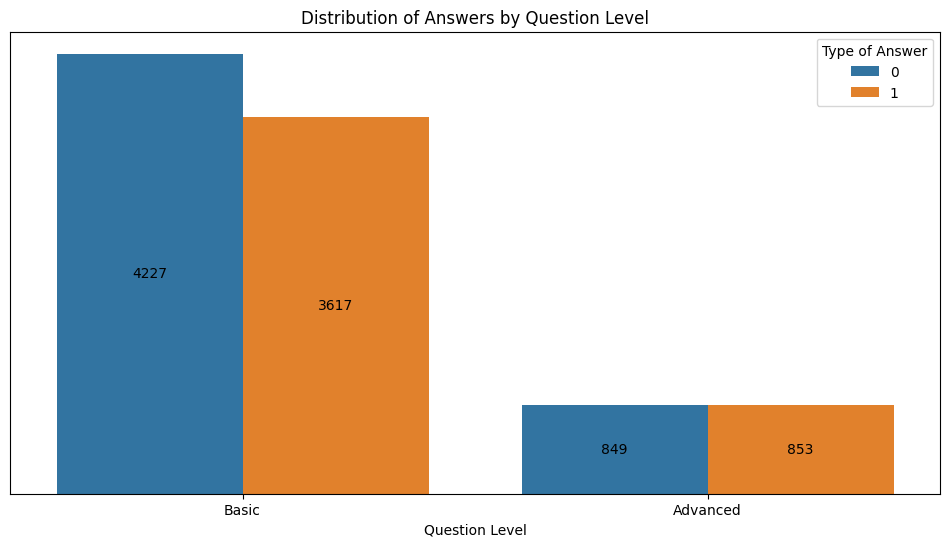

In [22]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(12, 6))
ax = sns.countplot(df, x='Question Level', hue='Type of Answer')
ax.yaxis.set_visible(False)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d')

plt.title('Distribution of Answers by Question Level')
plt.show()

In [23]:
df.columns

Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords', 'Ques Level Binary'],
      dtype='object')

In [24]:
# Get the distribution of categorical features
country_ans_proportion = df.groupby(['Student Country', 'Type of Answer'])['Type of Answer'].value_counts().reset_index(name='Count')
topic_ans_proportion = df.groupby(['Topic', 'Type of Answer'])['Type of Answer'].value_counts().reset_index(name='Count')

Text(0.5, 0.98, 'Distribution of answers by country and topic')

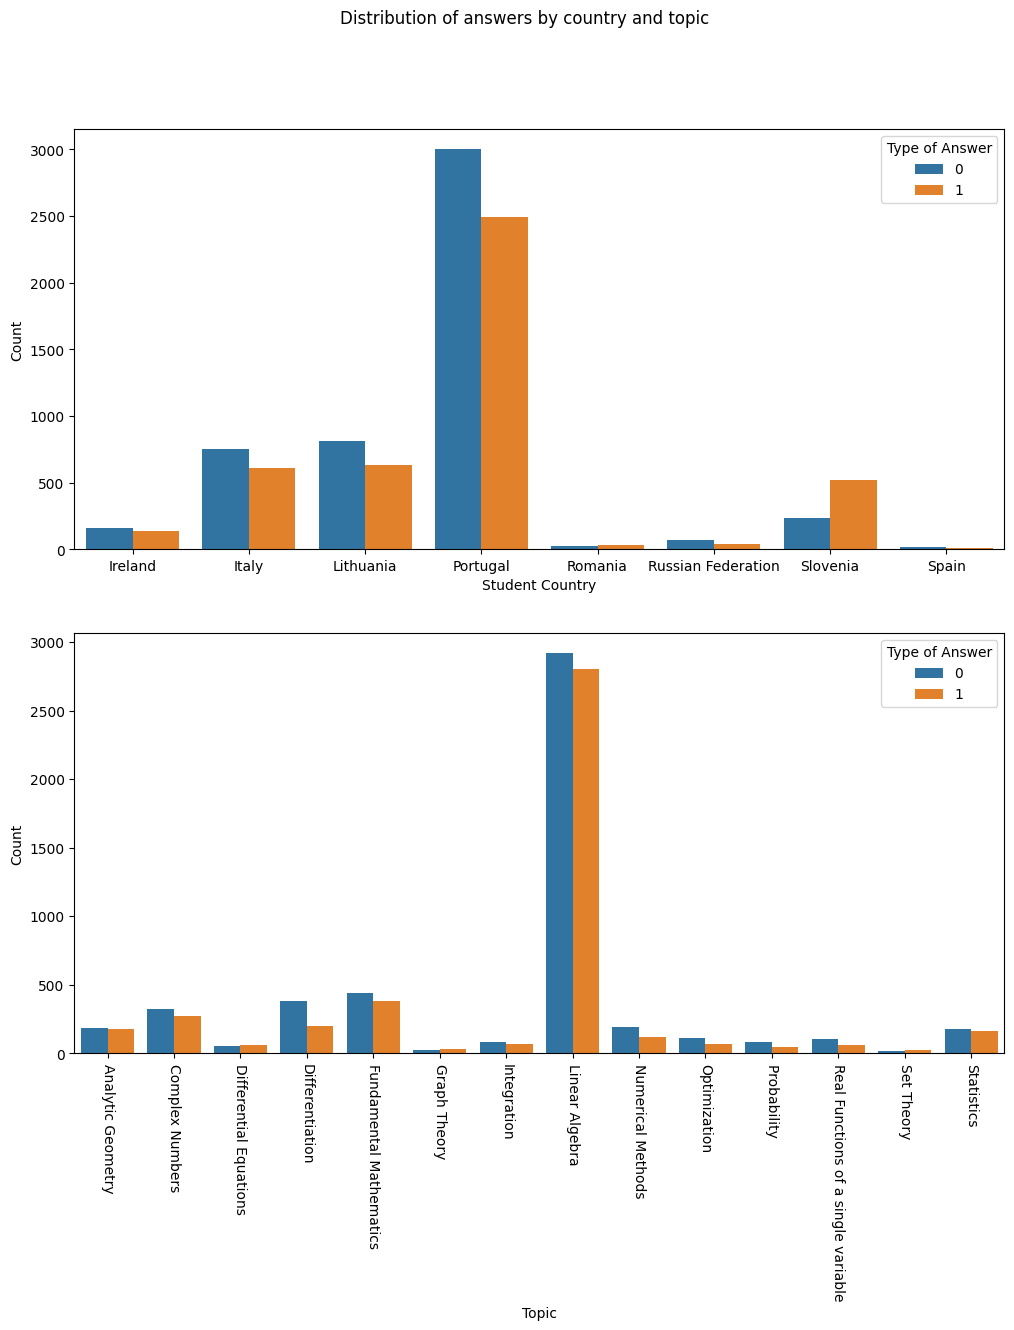

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(12,12))

sns.barplot(country_ans_proportion, x='Student Country', y='Count', hue='Type of Answer', ax=axs[0])
sns.barplot(topic_ans_proportion, x='Topic', y='Count', hue='Type of Answer', ax=axs[1])

axs[1].tick_params(axis='x', rotation=-90)
plt.suptitle('Distribution of answers by country and topic')

### **Word Analysis**

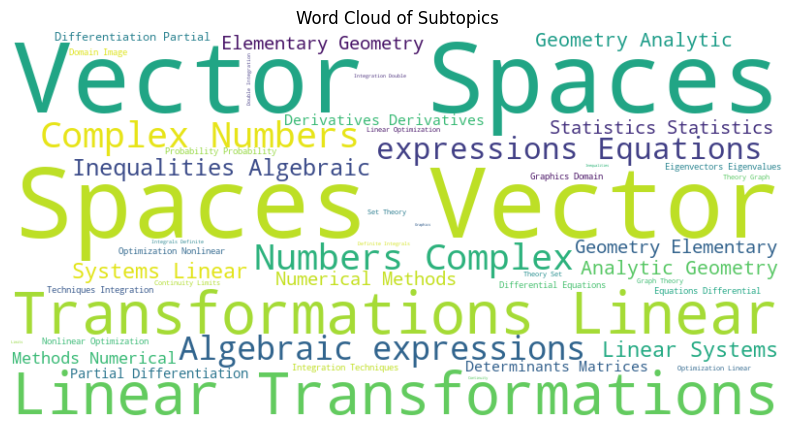

In [26]:
# Combine all keywords into a single string
subtopic_text = ' '.join(df['Subtopic'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subtopic_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Subtopics')
plt.show()


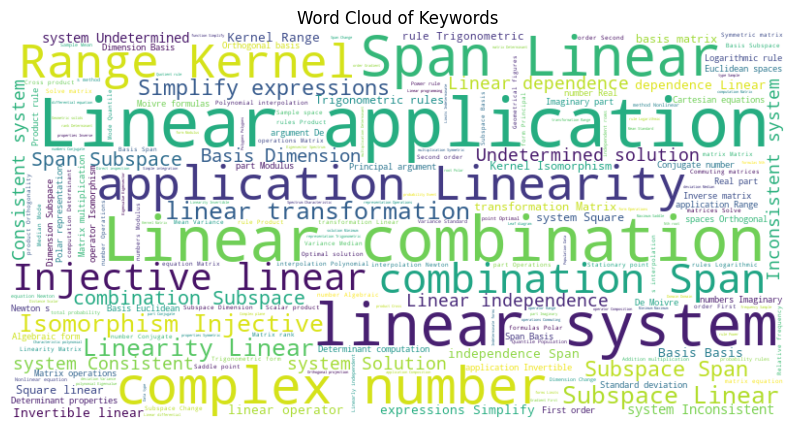

In [27]:
# Combine all keywords into a single string
keywords_text = ' '.join(df['Keywords'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()
